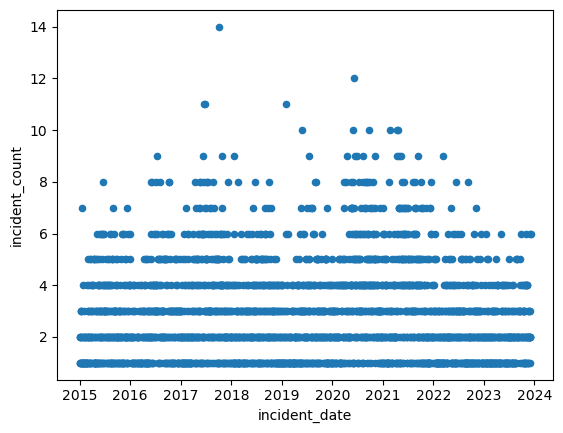

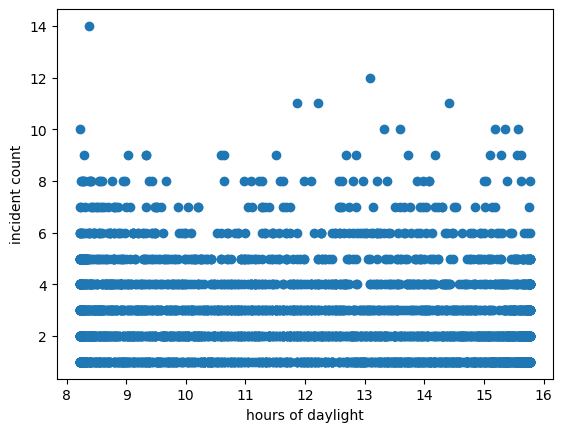

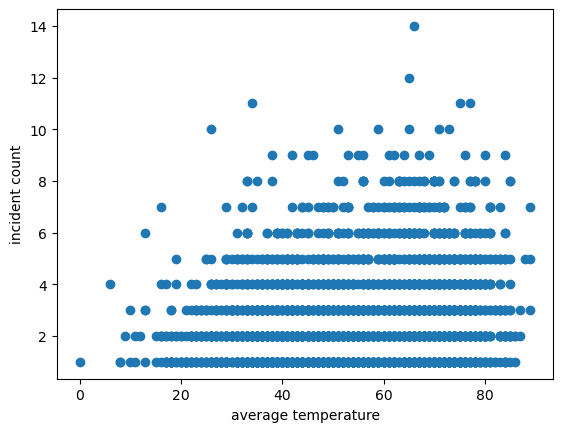

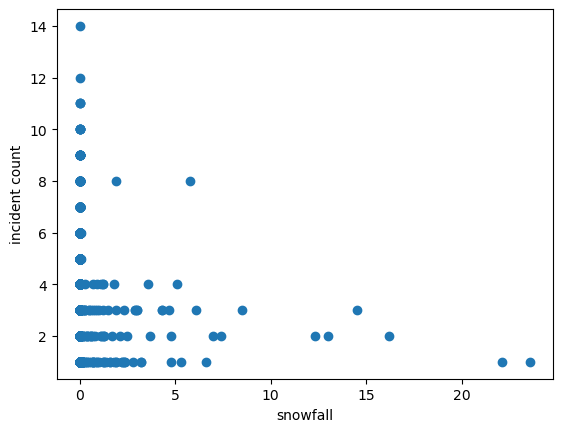

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%run 'ShotsFired_EDA copy.ipynb'


In [2]:
# data lookin good
shots_daily.head()

,incident_date,district,ballistics_evidence,incident_count,PRCP,SNOW,TAVG,hours_of_daylight
0,2015-01-01,C11A15,False,2,0.00,0.0,26,12.587640
1,2015-01-02,B3E13,True,2,0.00,0.0,34,12.646087
2,2015-01-03,B2,False,1,0.62,1.4,28,12.704440
3,2015-01-04,B2B2,True,2,0.57,0.0,38,12.762693
4,2015-01-05,C6,False,1,0.00,0.0,40,12.820834


In [3]:
shots_daily['incident_count'].unique()

array([ 2,  1,  3,  7,  4,  5,  6,  8,  9, 11, 14, 10, 12])

In [4]:
# let's create a X and y

X = shots_daily[['TAVG', 'SNOW', 'PRCP']]
y = shots_daily['incident_count']

print(X.shape)
print(y.shape)


(2806, 3)
(2806,)


In [5]:
# let's split our data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

# let's scale our data

# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# ss.fit(X_train)
# X_train = ss.transform(X_train)
# X_test = ss.transform(X_test)

In [6]:
# let's run a linear regression using keras

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(13, activation='softmax')
])


In [7]:
y_train = tf.one_hot(y_train, depth=13)

In [8]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [9]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [10]:
callback_val_loss = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
)

callback_val_accuracy = keras.callbacks.EarlyStopping(
    monitor="vall_accuracy",
    patience=6,
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.0000
)

In [11]:
batch_size = 128
epochs = 100

history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[callback_val_loss, reduce_lr],
                    validation_split=0.1
                    )

Epoch 1/100
15/15 [==============================] - 0s 6ms/step - loss: 4.9133 - accuracy: 0.1532 - val_loss: 2.5207 - val_accuracy: 0.1848 - lr: 0.0100
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 1.9843 - accuracy: 0.2578 - val_loss: 2.2002 - val_accuracy: 0.1991 - lr: 0.0100
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 1.9016 - accuracy: 0.2462 - val_loss: 2.1323 - val_accuracy: 0.2038 - lr: 0.0100
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 1.8881 - accuracy: 0.2351 - val_loss: 2.1459 - val_accuracy: 0.1991 - lr: 0.0100
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 1.8852 - accuracy: 0.2499 - val_loss: 2.1517 - val_accuracy: 0.1848 - lr: 0.0100
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1.8711 - accuracy: 0.2430 - val_loss: 2.1074 - val_accuracy: 0.2038 - lr: 0.0100
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 1.8

In [12]:
# let's score our model

model.evaluate(X_test, y_test, verbose=1)

ValueError: in user code:

    File "/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/keras/src/engine/training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/keras/src/engine/training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/keras/src/engine/training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/keras/src/engine/training.py", line 1895, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/keras/src/engine/training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/mark/anaconda3/envs/ds/lib/python3.11/site-packages/keras/src/backend.py", line 5575, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 13) are incompatible


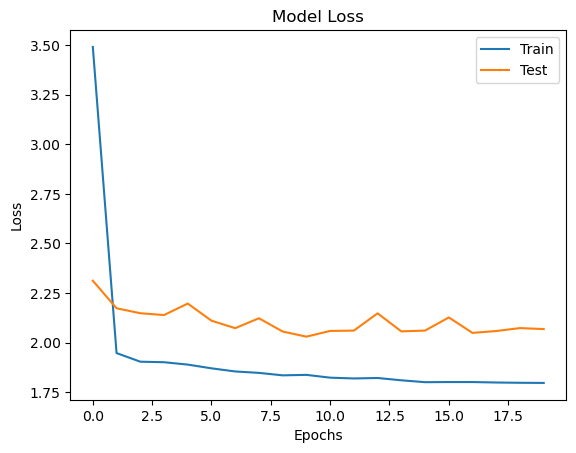

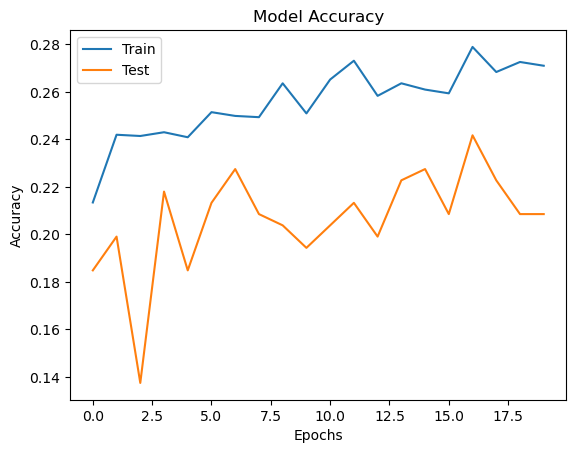

In [ ]:
# let's plot our loss and accuracy

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()


In [ ]:
# idea: we could try  and build models for every district, since different districts may have different trends
# we might be mixing too many trends here and that's why our model is not performing well

22/22 [==============================] - 0s 475us/step


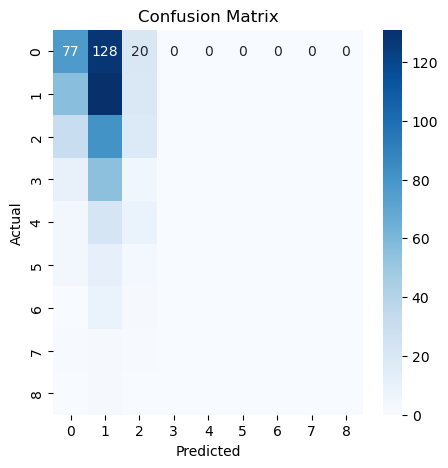

In [ ]:
# let's plot a confusion matrix

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred = pd.Series(y_pred)
y_pred

y_test = pd.Series(y_test)
y_test

confusion_matrix(y_test, y_pred)

# now let's plot this confusion matrix

import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


